In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import torch.nn as nn

In [ ]:
batch=4
train_dataset = torchvision.datasets.MNIST(root='./DATA',
                                           train=True,
                                           transform=torchvision.transforms.ToTensor(),
                                           download=True)

train_loader = DataLoader(dataset=train_dataset,
                                           batch_size=batch,
                                           shuffle=True)


test_dataset = torchvision.datasets.MNIST(root='./DATA',
                                          train=False,
                                          transform=torchvision.transforms.ToTensor())

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch,
                                          shuffle=False)


Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 41062268.64it/s]


Extracting ./DATA/MNIST/raw/train-images-idx3-ubyte.gz to ./DATA/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 17292747.16it/s]

Extracting ./DATA/MNIST/raw/train-labels-idx1-ubyte.gz to ./DATA/MNIST/raw



Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 43261093.16it/s]

Extracting ./DATA/MNIST/raw/t10k-images-idx3-ubyte.gz to ./DATA/MNIST/raw



Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 3083607.76it/s]

Extracting ./DATA/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./DATA/MNIST/raw



In [ ]:
dataiter = iter(train_loader)
type(dataiter)

torch.utils.data.dataloader._SingleProcessDataLoaderIter

In [ ]:
data=next(dataiter)
print(type(data))

<class 'list'>


In [ ]:
image,label=data
print(image.shape)
tmp=image.reshape(-1,28*28)
print(tmp.shape)
#image.reshape?

torch.Size([4, 1, 28, 28])
torch.Size([4, 784])


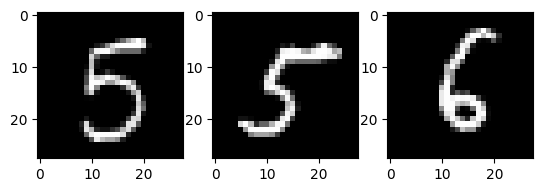

In [ ]:
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(image[i][0], cmap='gray')
plt.show()


My label is  tensor(5)
BTW I'm nice image size of= torch.Size([28, 28])


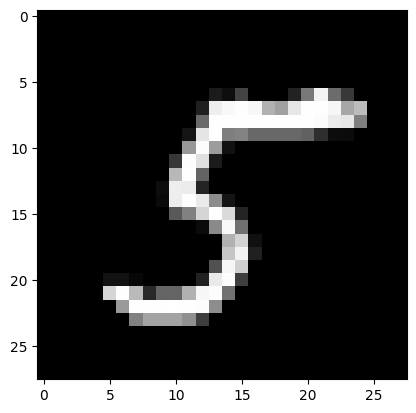

In [ ]:
plt.imshow(image[1][0],cmap='gray')
print("My label is ",label[1])
print("BTW I'm nice image size of=",(image[1][0]).shape)

In [ ]:
class NeuralNetModel(nn.Module):
    def __init__(self,input_size,hidden_layer_size,output_size):
        #output_size = number of classes
        super().__init__()
        self.activation=nn.ReLU()
        self.input_size = input_size
        self.layer1=nn.Linear(input_size,hidden_layer_size)
        self.layer2=nn.Linear(hidden_layer_size,output_size)
    def forward(self,x):
        y=self.layer1(x)
        y=self.activation(y)
        y=self.layer2(y)
        return y

In [ ]:
input_size=28*28
hidden_layer_size=100
output_size= 10 # classes 0 1 ... 9
print("input_size=",input_size)
model=NeuralNetModel(input_size,hidden_layer_size,output_size)
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

input_size= 784


In [ ]:
number_epochs=3  # It's not enough
for epoch in range(number_epochs):
    for count, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        images=images.reshape(-1,28*28)
        prediction=model(images)
        loss=loss_function(prediction,labels)
        loss.backward()
        optimizer.step()
        if count % 100 == 0:
            print("epoch=",epoch,"batch count=",count,"loss=",loss)

epoch= 0 batch count= 0 loss= tensor(2.3211, grad_fn=<NllLossBackward0>)
epoch= 0 batch count= 100 loss= tensor(1.4825, grad_fn=<NllLossBackward0>)
epoch= 0 batch count= 200 loss= tensor(0.2231, grad_fn=<NllLossBackward0>)
epoch= 0 batch count= 300 loss= tensor(0.0742, grad_fn=<NllLossBackward0>)
epoch= 0 batch count= 400 loss= tensor(0.1534, grad_fn=<NllLossBackward0>)
epoch= 0 batch count= 500 loss= tensor(0.1729, grad_fn=<NllLossBackward0>)
epoch= 0 batch count= 600 loss= tensor(0.0090, grad_fn=<NllLossBackward0>)
epoch= 0 batch count= 700 loss= tensor(0.6129, grad_fn=<NllLossBackward0>)
epoch= 0 batch count= 800 loss= tensor(0.0330, grad_fn=<NllLossBackward0>)
epoch= 0 batch count= 900 loss= tensor(0.2279, grad_fn=<NllLossBackward0>)
epoch= 0 batch count= 1000 loss= tensor(0.1343, grad_fn=<NllLossBackward0>)
epoch= 0 batch count= 1100 loss= tensor(0.1078, grad_fn=<NllLossBackward0>)
epoch= 0 batch count= 1200 loss= tensor(0.2897, grad_fn=<NllLossBackward0>)
epoch= 0 batch count= 13

In [ ]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
      tmp = images
      images = images.reshape(-1, 28*28)
      outputs = model(images)
       # max returns (value ,index)
      _, predicted = torch.max(outputs.data, 1)
      n_samples += labels.size(0)
      n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

Accuracy of the network on the 10000 test images: 93.0 %


In [ ]:
acc

93.0

In [ ]:
(predicted == labels)*1

tensor([1, 1, 1, 1])

In [ ]:
outputs = model(images)
outputs

tensor([[ -53.8378,  -16.6248,  -16.4027,   12.8781,  -28.6380,   -9.5469,
         -108.9619,  -15.0327,  -16.2981,  -16.3877],
        [ -46.4398,  -32.4293,  -25.8800,  -23.8602,    0.4272,  -31.2057,
          -17.3380,  -12.8952,  -18.3550,  -14.6447],
        [ -23.8793, -100.5926,  -92.2506,  -72.1333,  -86.8142,   -7.3385,
          -76.9701,  -28.1455,  -31.2421,  -87.8169],
        [ -42.2604,  -63.5980,  -11.2450,  -89.1063,  -49.6313,  -35.4987,
            9.4504,  -85.6384,  -47.7900, -147.9192]],
       grad_fn=<AddmmBackward0>)

In [ ]:
outputs.data

tensor([[ -53.8378,  -16.6248,  -16.4027,   12.8781,  -28.6380,   -9.5469,
         -108.9619,  -15.0327,  -16.2981,  -16.3877],
        [ -46.4398,  -32.4293,  -25.8800,  -23.8602,    0.4272,  -31.2057,
          -17.3380,  -12.8952,  -18.3550,  -14.6447],
        [ -23.8793, -100.5926,  -92.2506,  -72.1333,  -86.8142,   -7.3385,
          -76.9701,  -28.1455,  -31.2421,  -87.8169],
        [ -42.2604,  -63.5980,  -11.2450,  -89.1063,  -49.6313,  -35.4987,
            9.4504,  -85.6384,  -47.7900, -147.9192]])

In [ ]:
_, predicted = torch.max(outputs.data, 1)
predicted

tensor([3, 4, 5, 6])

In [ ]:
_

tensor([12.8781,  0.4272, -7.3385,  9.4504])

In [ ]:
labels

tensor([3, 4, 5, 6])

<function matplotlib.pyplot.show(close=None, block=None)>

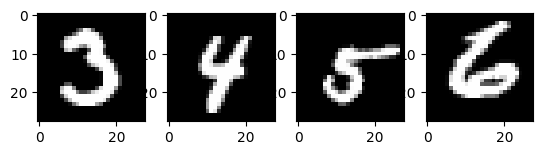

In [ ]:
for i in range(4):
  plt.subplot(1, 4, i+1)
  plt.imshow(tmp[i][0], cmap='gray')
plt.show

Epoch 1/20 - Train Loss: 0.4126 - Val Loss: 0.2879 - Val Accuracy: 91.80%
Epoch 2/20 - Train Loss: 0.2260 - Val Loss: 0.2063 - Val Accuracy: 93.93%
Epoch 3/20 - Train Loss: 0.1625 - Val Loss: 0.1693 - Val Accuracy: 95.04%
Epoch 4/20 - Train Loss: 0.1324 - Val Loss: 0.1534 - Val Accuracy: 95.54%
Epoch 5/20 - Train Loss: 0.1122 - Val Loss: 0.1512 - Val Accuracy: 95.69%
Epoch 6/20 - Train Loss: 0.0956 - Val Loss: 0.1276 - Val Accuracy: 96.36%
Epoch 7/20 - Train Loss: 0.0834 - Val Loss: 0.1341 - Val Accuracy: 96.21%
Epoch 8/20 - Train Loss: 0.0764 - Val Loss: 0.1189 - Val Accuracy: 96.51%
Epoch 9/20 - Train Loss: 0.0680 - Val Loss: 0.1241 - Val Accuracy: 96.58%
Epoch 10/20 - Train Loss: 0.0610 - Val Loss: 0.1127 - Val Accuracy: 96.78%
Epoch 11/20 - Train Loss: 0.0562 - Val Loss: 0.1129 - Val Accuracy: 96.68%
Epoch 12/20 - Train Loss: 0.0531 - Val Loss: 0.1264 - Val Accuracy: 96.48%
Epoch 13/20 - Train Loss: 0.0472 - Val Loss: 0.1163 - Val Accuracy: 96.77%
Epoch 14/20 - Train Loss: 0.0427 -

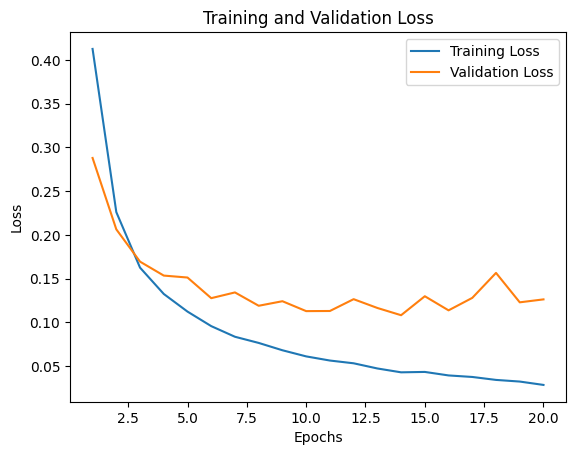

Accuracy of the network on the 10000 test images: 97.47 %


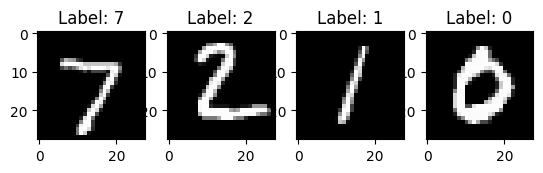

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Ustawienie urządzenia
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Definiowanie datasetu i transformacji
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)

# Podział na zbiór treningowy i walidacyjny
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# Definicja sieci neuronowej
class NeuralNetModel(nn.Module):
    def __init__(self, input_size, hidden_layer_size, output_size):
        super().__init__()
        self.activation = nn.ReLU()
        self.layer1 = nn.Linear(input_size, hidden_layer_size)
        self.layer2 = nn.Linear(hidden_layer_size, output_size)

    def forward(self, x):
        y = self.layer1(x)
        y = self.activation(y)
        y = self.layer2(y)
        return y

input_size = 28 * 28
hidden_layer_size = 100
output_size = 10

model = NeuralNetModel(input_size, hidden_layer_size, output_size).to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Pętla trenowania
n_epochs = 20
train_losses, val_losses = [], []

for epoch in range(1, n_epochs + 1):
    model.train()
    train_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        images = images.reshape(-1, 28 * 28)

        optimizer.zero_grad()
        prediction = model(images)
        loss = loss_function(prediction, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.size(0)
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    # Faza walidacji
    model.eval()
    val_loss = 0.0
    correct = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            images = images.reshape(-1, 28 * 28)
            outputs = model(images)
            loss = loss_function(outputs, labels)
            val_loss += loss.item() * images.size(0)
            _, predicted = outputs.max(1)
            correct += (predicted == labels).sum().item()

    val_loss /= len(val_loader.dataset)
    val_losses.append(val_loss)
    accuracy = 100. * correct / len(val_loader.dataset)
    print(f"Epoch {epoch}/{n_epochs} - Train Loss: {train_loss:.4f} - Val Loss: {val_loss:.4f} - Val Accuracy: {accuracy:.2f}%")

# Wykres strat treningowych i walidacyjnych
plt.plot(range(1, n_epochs + 1), train_losses, label="Training Loss")
plt.plot(range(1, n_epochs + 1), val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

# Ocena dokładności na zbiorze testowym
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

n_correct = 0
n_samples = 0
examples = iter(test_loader)
example_data, example_targets = next(examples)

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        images = images.reshape(-1, 28 * 28)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

accuracy = 100.0 * n_correct / n_samples
print(f'Accuracy of the network on the 10000 test images: {accuracy} %')

# Wyświetlanie przykładowych obrazów z etykietami
fig = plt.figure()
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(example_data[i][0], cmap='gray')
    plt.title(f'Label: {example_targets[i].item()}')
plt.show()
